# Baseline Learning

Labels: Primary Type of Crime

Model: Logistic Regression

## Import and data loading

In [ ]:
import numpy as np
import pandas as pd
import gdown
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_id = "16Yg-rMcVEOJ57pN6z-LFaHK4YrXSin__"
url = f"https://drive.google.com/uc?id={file_id}"

output = "crime_df.pkl"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=16Yg-rMcVEOJ57pN6z-LFaHK4YrXSin__
To: /content/crime_df.pkl
100%|██████████| 19.6M/19.6M [00:00<00:00, 79.3MB/s]


'crime_df.pkl'

In [ ]:
with open(output, 'rb') as file:
    crime_df = pickle.load(file)

crime_df.iloc[1]

,1
Date,2024-10-10 00:00:00
Block,091XX S EGGLESTON AVE
Primary Type,MOTOR VEHICLE THEFT
Location Description,STREET
District,22
Ward,9
Community Area,73
Latitude,41.728316
Longitude,-87.634933
DateTime,1728518400.0


## Remove redundant data

In [ ]:
crime_df = crime_df.dropna()

# Date already converted as DateTime
columns_to_drop = ['Block', 'Date']
crime_df_drop = crime_df.drop(columns=columns_to_drop)
crime_df_drop.iloc[1]

,1
Primary Type,MOTOR VEHICLE THEFT
Location Description,STREET
District,22
Ward,9
Community Area,73
Latitude,41.728316
Longitude,-87.634933
DateTime,1728518400.0
Hour,0
is_Holiday,False


## Convert catagorical data

In [ ]:
label_encoder = LabelEncoder()
crime_df_encode = crime_df_drop.copy()
crime_df_encode['Primary Type'] = label_encoder.fit_transform(crime_df_drop['Primary Type'])
crime_df_encode = pd.get_dummies(crime_df_encode, columns=['Location Description', 'District', 'Ward', 'Community Area'])

In [ ]:
for i in crime_df_encode.columns:
    print(i)

Primary Type
Latitude
Longitude
DateTime
Hour
is_Holiday
PRCP
SNOW
TAVG
Location Description_ABANDONED BUILDING
Location Description_AIRCRAFT
Location Description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA
Location Description_AIRPORT BUILDING NON-TERMINAL - SECURE AREA
Location Description_AIRPORT EXTERIOR - NON-SECURE AREA
Location Description_AIRPORT EXTERIOR - SECURE AREA
Location Description_AIRPORT PARKING LOT
Location Description_AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA
Location Description_AIRPORT TERMINAL LOWER LEVEL - SECURE AREA
Location Description_AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA
Location Description_AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA
Location Description_AIRPORT TERMINAL UPPER LEVEL - SECURE AREA
Location Description_AIRPORT TRANSPORTATION SYSTEM (ATS)
Location Description_AIRPORT VENDING ESTABLISHMENT
Location Description_ALLEY
Location Description_ANIMAL HOSPITAL
Location Description_APARTMENT
Location Description_APPLIANCE STORE
Locat

## Split dataset

In [ ]:
X = crime_df_encode.drop(columns=['Primary Type'])
y = crime_df_encode['Primary Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=534)

## Train & Test (Takes about 4min30s to run)

In [ ]:
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.23


## Conclusion

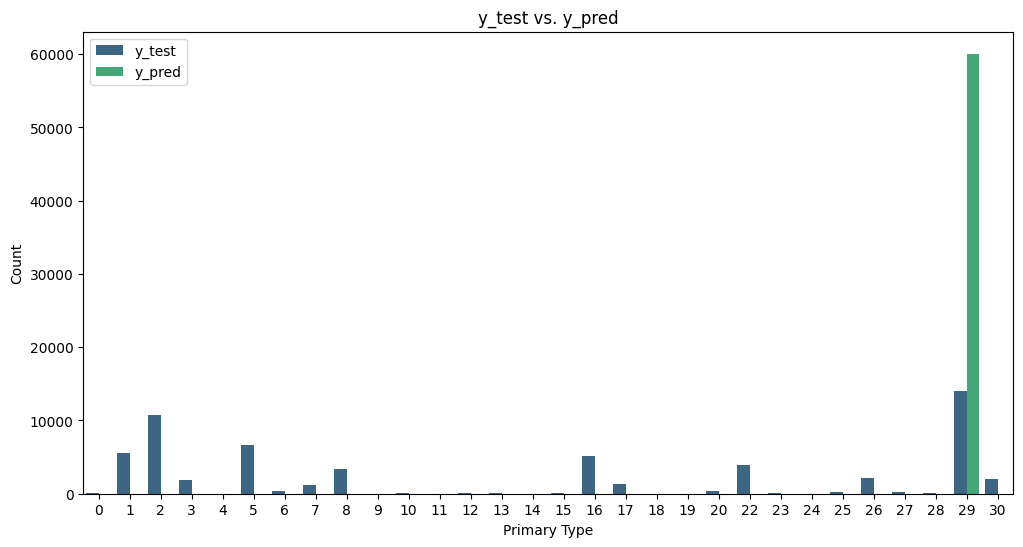

In [ ]:
y_test_df = pd.DataFrame({'Primary Type': y_test, 'Data': 'y_test'})
y_pred_df = pd.DataFrame({'Primary Type': y_pred, 'Data': 'y_pred'})
combined_df = pd.concat([y_test_df, y_pred_df])

plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, x='Primary Type', hue='Data', palette='viridis')
plt.title('y_test vs. y_pred')
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.legend()
plt.show()

Baseline LogisticRegression performs bad, assign all types as the most frequent type of crime(29, Theft).

TODO: Set class weight? Sampling?